In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('heart.csv')

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.shape

(918, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

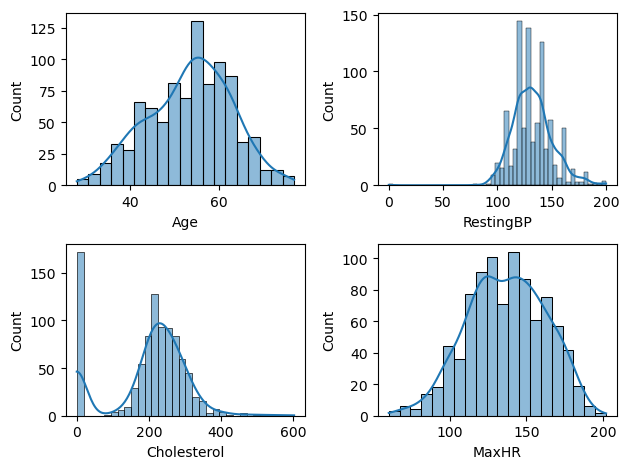

In [9]:
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde=True)

plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)
plt.tight_layout()

In [10]:
df_mean=df.loc[df['Cholesterol']!=0,'Cholesterol'].mean()

In [11]:
df_mean

np.float64(244.6353887399464)

In [12]:
df['Cholesterol']=df['Cholesterol'].replace(0,df_mean)

In [13]:
rbp_mean=df.loc[df['RestingBP']!=0,'RestingBP'].mean()

In [14]:
df['RestingBP']=df['RestingBP'].replace(0,df_mean)

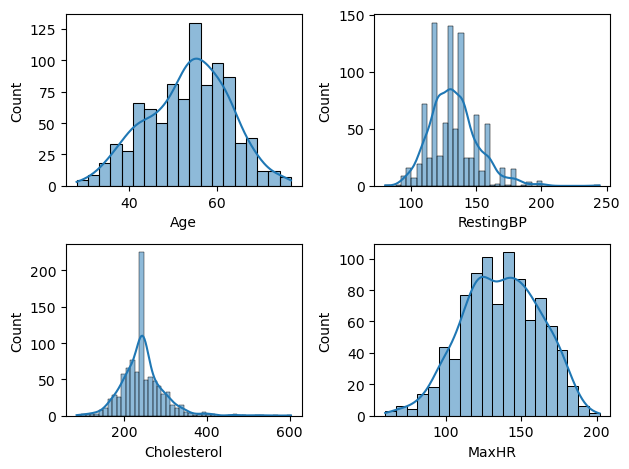

In [15]:
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde=True)

plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)
plt.tight_layout()

<Axes: xlabel='Sex', ylabel='count'>

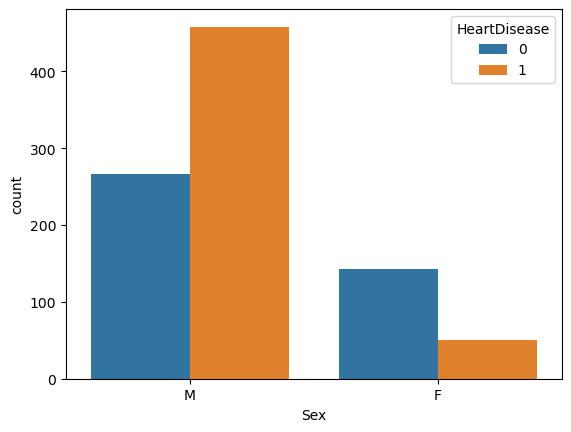

In [16]:
sns.countplot(x=df['Sex'],hue=df['HeartDisease'])

<Axes: xlabel='ChestPainType', ylabel='count'>

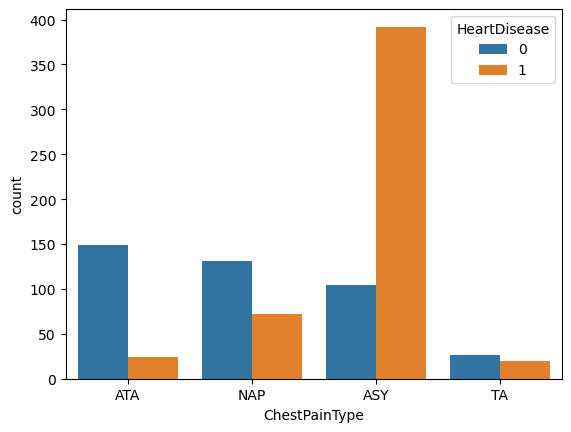

In [17]:
sns.countplot(x=df['ChestPainType'],hue=df['HeartDisease'])

<Axes: xlabel='RestingECG', ylabel='count'>

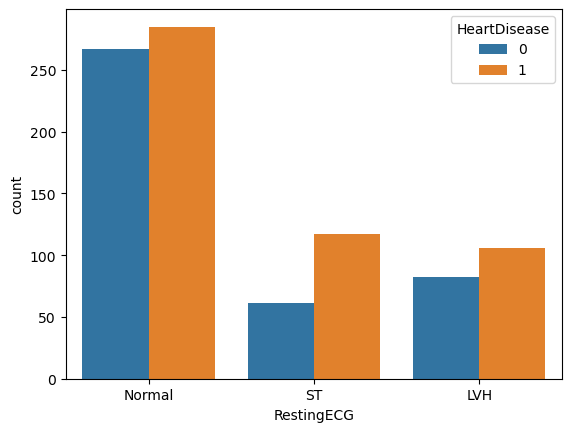

In [18]:
sns.countplot(x=df['RestingECG'],hue=df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

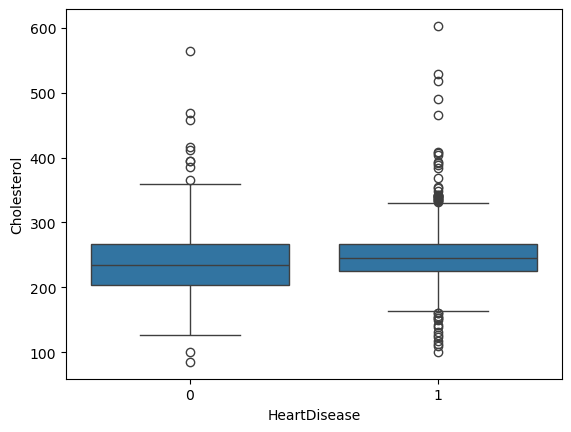

In [19]:
sns.boxplot(y=df['Cholesterol'],x=df['HeartDisease'],data=df)

<Axes: >

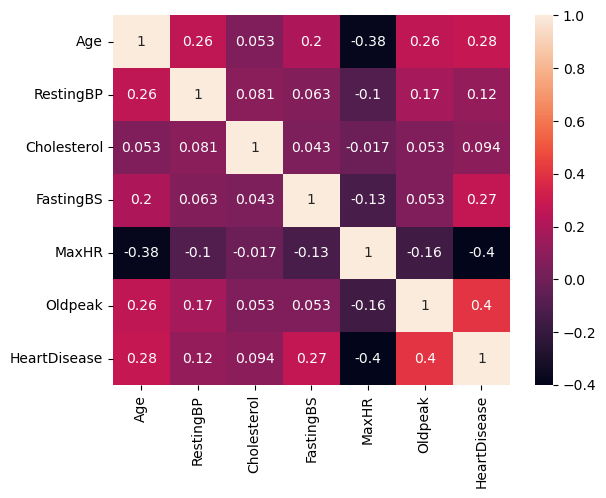

In [20]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [21]:
df['Age_Categories']=pd.cut(df['Age'],bins=[10,30,50,float('inf')],labels=['Youth','MAN','Old'])

In [22]:
df['Cholesterol_Categories']=pd.cut(df['Cholesterol'],bins=[0,200,400,float('inf')],labels=['Low','Normal','High'])

In [51]:
df_encode=pd.get_dummies(df)

In [52]:
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Age_Categories_Youth,Age_Categories_MAN,Age_Categories_Old,Cholesterol_Categories_Low,Cholesterol_Categories_Normal,Cholesterol_Categories_High
0,40,140.0,289.0,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,True,False
1,49,160.0,180.0,0,156,1.0,1,True,False,False,...,False,False,True,False,False,True,False,True,False,False
2,37,130.0,283.0,0,98,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,True,False
3,48,138.0,214.0,0,108,1.5,1,True,False,True,...,True,False,True,False,False,True,False,False,True,False
4,54,150.0,195.0,0,122,0.0,0,False,True,False,...,False,False,False,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1,False,True,False,...,False,False,True,False,False,True,False,False,True,False
914,68,144.0,193.0,1,141,3.4,1,False,True,True,...,False,False,True,False,False,False,True,True,False,False
915,57,130.0,131.0,0,115,1.2,1,False,True,True,...,True,False,True,False,False,False,True,True,False,False
916,57,130.0,236.0,0,174,0.0,1,True,False,False,...,False,False,True,False,False,False,True,False,True,False


In [53]:
df_encode=df_encode.astype(int)

In [54]:
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Age_Categories_Youth,Age_Categories_MAN,Age_Categories_Old,Cholesterol_Categories_Low,Cholesterol_Categories_Normal,Cholesterol_Categories_High
0,40,140,289,0,172,0,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
1,49,160,180,0,156,1,1,1,0,0,...,0,0,1,0,0,1,0,1,0,0
2,37,130,283,0,98,0,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
3,48,138,214,0,108,1,1,1,0,1,...,1,0,1,0,0,1,0,0,1,0
4,54,150,195,0,122,0,0,0,1,0,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
914,68,144,193,1,141,3,1,0,1,1,...,0,0,1,0,0,0,1,1,0,0
915,57,130,131,0,115,1,1,0,1,1,...,1,0,1,0,0,0,1,1,0,0
916,57,130,236,0,174,0,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0


In [55]:
from sklearn.preprocessing import StandardScaler
numeric_value=['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler=StandardScaler()
df_encode[numeric_value]=scaler.fit_transform(df_encode[numeric_value])

In [56]:
df_encode.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Age_Categories_Youth,Age_Categories_MAN,Age_Categories_Old,Cholesterol_Categories_Low,Cholesterol_Categories_Normal,Cholesterol_Categories_High
0,-1.433140,0.399826,0.834754,0,1.382928,-0.727592,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
1,-0.478484,1.489614,-1.210675,0,0.754157,0.282891,1,1,0,0,...,0,0,1,0,0,1,0,1,0,0
2,-1.751359,-0.145068,0.722161,0,-1.525138,-0.727592,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
3,-0.584556,0.290847,-0.572651,0,-1.132156,0.282891,1,1,0,1,...,1,0,1,0,0,1,0,0,1,0
4,0.051881,0.944720,-0.929194,0,-0.581981,-0.727592,0,0,1,0,...,0,0,0,1,0,0,1,1,0,0


In [57]:
df_encode.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up', 'Age_Categories_Youth',
       'Age_Categories_MAN', 'Age_Categories_Old',
       'Cholesterol_Categories_Low', 'Cholesterol_Categories_Normal',
       'Cholesterol_Categories_High'],
      dtype='object')

In [58]:
X = df_encode.drop('HeartDisease', axis=1)
y = df_encode['HeartDisease']

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42)


In [61]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
results=[]

In [71]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [72]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM (RBF Kernel)": SVC(probability=True)
}

In [73]:
for name, model in models.items():
    model.fit(X_train_scaled,y_train)
    y_pred=model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({
        "Model name":name
        ,"Accuracy":round(acc,4)
        ,"F1":round(f1,4)
    })

In [74]:
results

[{'Model name': 'Logistic Regression', 'Accuracy': 0.8859, 'F1': 0.8986},
 {'Model name': 'KNN', 'Accuracy': 0.8424, 'F1': 0.8612},
 {'Model name': 'Naive Bayes', 'Accuracy': 0.8261, 'F1': 0.8609},
 {'Model name': 'Decision Tree', 'Accuracy': 0.7772, 'F1': 0.7897},
 {'Model name': 'SVM (RBF Kernel)', 'Accuracy': 0.8641, 'F1': 0.8804}]

In [ ]:
import joblib
joblib.dump(models['KNN'],'KNN_heart.pkl')
joblib.dump(scaler,'scaler.pkl')
joblib.dump(X.columns.tolist(),'columns.pkl')